In [9]:
from skimage.transform import resize
import os
from multiprocessing import pool
import numpy as np
import nibabel as nib
import sys
import glob
import gzip
from tqdm import tqdm
import matplotlib.pyplot as plt
from segment_anything import SamPredictor, sam_model_registry, SamAutomaticMaskGenerator
import torch

In [11]:
# load SAM Model
os.chdir("..")
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
MODEL_TYPE = "vit_h"
CHECKPOINT_PATH = "sam_vit_h_4b8939.pth"
sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH)
sam.to(device=DEVICE)
predictor = SamPredictor(sam)

In [13]:
file_path = (
    "/Users/lisa/Documents/Master/sam-lab/ACDC/database/preprocess/images.npy.gz"
)
with gzip.open(file_path, "rb") as f:
    # Load the NumPy array from the file
    images = np.load(f)

In [15]:
embeddings = []
# loop through all images in preprocess
for image in tqdm(images):
    print(image.shape)
    predictor.set_image(image)
    embedding = predictor.get_image_embedding()
    embeddings.append(embedding)

# concat all embeddings to a big tensor
combined_embeddings = torch.cat(embeddings, dim=0)
torch.save(combined_embeddings, "embeddings.pt")

  0%|          | 0/2978 [00:00<?, ?it/s]


(256, 216)


RuntimeError: permute(sparse_coo): number of dimensions in the tensor input does not match the length of the desired ordering of dimensions i.e. input.dim() = 2 is not equal to len(dims) = 3

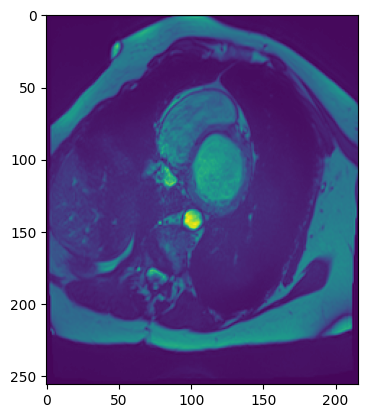

In [7]:
plt.imshow(loaded_array[0])